# Gaussian Regression
This demo implements a regression of a Stationary Gaussian Process of the form:
$$ y \sim N(\beta X,\Sigma_p)  $$
where $$ y = \beta X + Z(x) + \epsilon$$.
$$ Z(x) \sim N(0,\Sigma_p)$$ 
$ \Sigma $ describes the covariance structure. In this case, the constraint is an stationary process therefore , $Z(x)$ is invariant by translations. In other words:  

$$ \mathbb{P}[X_i=x_i] = \mathbb{P}[X_i + h=x_i] $$

By definition, a stationary process $\{X(p) $  $p \in \mathbb{R}^2\}$ such that (at least for a gaussian random variable).:
1. $$ \mathbb{E}(X_i) = \mathbb{E}(X_j)$$ for all $i \neq j $.
and
2. $$\mathbb{E}(X_i X_j) = \mathbb{E}((X_i + h),(X_j + h))$$

Therefore:
For all $X_i$ :
$$\mathbb{E}(X_i) = \mu $$
and 
The correlation function: 
$$Corr(X_i,X_j) = Corr((X_i - X_j))$$

For the Z(x) described it implies that: 
$$ \mathbb{E}(X_i) = 0$$ and $$Var(X_i) = \tau^2 \space \space \forall i \in \{1,...,n\}$$

Remembering that: $$ Corr(x_i,x_j) = \frac{Cov(x_i,x_j)}{\sqrt{Var(x_i) Var(x_j)}}$$

If we restrict futher to an Isotropic process Z(X) we will have that: $\rho(d) = Corr(x_i,x_j)$ where $ d = || (x_i,x_j) ||$ i.e the euclidean distance between $x_i$ and $x_j$ .

Thus


$$ Cov(x_i,x_j) = \tau^2 \rho(d) $$

In [1]:
# Let´s do it man!!

In [10]:
import numpy as np
import scipy as sp
from functools import partial
import os
os.environ['DISPLAY'] = '192.168.0.5:0'

In [11]:
def corr_exp_ij(distance,phi=1.0):
    """
    This function calculates the correlation function of an exponential model with parameter phi.
    Returns :
        correlation value for distance 'distance'
    """
    return np.exp(-(distance / phi))

In [12]:
def generateCorrelationFunctional(function, list_parameter_space,parameter_name):
    """
    Returns a list of functions mapped with a partition.
    i.e. given a function $f$ with parameters $\theta$ for a given parameter.
    """
    f = function
    functions = map(lambda phi : partial(f,parameter_name=phi),list_parameter_space)
    return functions

In [13]:
### Calculate cross product of time for distance matrix
makeDuples = lambda list_of_points : [(i,j) for i in list_of_points for j in list_of_points]

In [14]:
## This function returns a Distance Matrix given a list of pairs of the form (a,b). It will calculate de distance between (a and b) 
calculateDistanceMatrix = lambda list_of_vectors : np.array(map(lambda (a,b) : np.linalg.norm(a-b),list_of_vectors))
## note it doesn't have shape of a matrix but doesn't matter.


## Calculate correlations 
makeCorrelations = lambda model : lambda list_of_points : np.array(map(model,calculateDistanceMatrix(makeDuples(list_of_points))))
## Calculate covariances
makeCovarianceMatrix = lambda sigma : lambda model: lambda list_of_points : (makeCorrelations(model)(list_of_points) * sigma)#.reshape(100,100)
## Different models for phi
covarianceMatricesModels = lambda list_of_points : map(lambda model : makeCovarianceMatrix(1.0)(model)(list_of_points),corr_exp_list)

#covarianceMatricesModels = map(lambda model : makeCovarianceMatrix(1.0)(list_of_points)(list_of_points),corr_exp_list)


#### Let's generate several correlation functions for different phis

corr_exp_list = map(lambda phi : partial(corr_exp_ij,phi=phi),np.linspace(1,100,50))
corr_exp_list = map(lambda phi : partial(corr_exp_ij,phi=phi),[0.001,20,80])
corr_exp_list = map(lambda phi : partial(corr_exp_ij,phi=phi),[20])



In [15]:
## Generate the preimage . For this exampe will be: time \in R

time = np.linspace(0, 100, 100)
lat = np.linspace(0,100,50)
lon = np.linspace(0,100,50)

points = map(lambda l : np.array(l),makeDuples(lat))





## Simulation process

zeros = lambda list_of_points : np.zeros(np.sqrt(len(list_of_points))**2)

simulateWithThisPoints = lambda list_of_points : map(lambda Sigma : sp.random.multivariate_normal(zeros(list_of_points),Sigma.reshape(len(list_of_points),len(list_of_points))),covarianceMatricesModels(list_of_points))




In [16]:
dd = simulateWithThisPoints(points)

/opt/conda/envs/biospytial/lib/python2.7/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [17]:
simulation = dd[0].reshape(50,50)

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

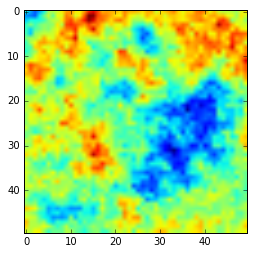

In [22]:
plt.imshow(simulation)

In [20]:
plt.show()